In [1]:
%cd ../../

/home/dmoreno/ATAT_ZTF/elasticc_one


In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np


import torch 
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#from utils import get_metrics, plot_values_times, plot_result_ablation, f1_values

# Evaluating performance over time

In [3]:
name_file_results = 'results_paper'

list_eval_time = ['0008', '0016', '0032', '0064', '0128', '0256', '0512', '1024', '2048']

In [4]:
data_root = 'data/final/ZTF_ff/LC_MD_FEAT_v2_windows' 
data_root

'data/final/ZTF_ff/LC_MD_FEAT_v2_windows'

In [5]:
predictions = torch.load('results/ZTF/LC/{}/predictions_times.pt'.format('prueba_lc_v2_windows'))
predictions

{'SNID': array([b'ZTF17aaagryq_0', b'ZTF17aaagryq_1', b'ZTF17aaagryq_2', ...,
        b'ZTF23aamsarj_0', b'ZTF23aamsarj_1', b'ZTF23aamsarj_2'],
       dtype=object),
 'y_test': tensor([ 9,  9,  9,  ..., 19, 19, 19]),
 'list_y_pred': {'test_16': array([ 4, 10, 11, ...,  6, 19, 19]),
  'test_32': array([ 2,  9, 11, ..., 19,  6,  6]),
  'test_64': array([ 2,  9, 11, ..., 19, 16,  6]),
  'test_128': array([ 2,  9, 11, ..., 14,  6, 20]),
  'test_256': array([ 4,  9, 11, ...,  6, 14, 20]),
  'test_512': array([11,  4,  9, ...,  6, 19, 20]),
  'test_1024': array([ 4,  4,  9, ...,  6, 19, 20]),
  'test_2048': array([ 4,  4,  9, ...,  6, 19, 20])},
 'list_y_pred_prob': {'test_16': array([[9.2251692e-11, 2.1606479e-04, 2.1700096e-01, ..., 6.4945751e-05,
          1.3036774e-04, 4.2450966e-15],
         [6.5605943e-10, 4.4590610e-04, 1.3327655e-02, ..., 2.0877296e-06,
          4.4950859e-08, 4.9428644e-17],
         [1.6933125e-14, 1.9995008e-07, 1.3728034e-02, ..., 5.9427609e-11,
          3.32

In [6]:
dict_snid_windows = dict()
for snid in predictions['SNID']:
    split_item = snid.decode().split('_')
    snid, num_window = split_item[0], split_item[1]
    dict_snid_windows[snid] = num_window

In [7]:
list_snids = []
for key, value in dict_snid_windows.items():
    if value == '0':
        list_snids.append('{}_{}'.format(key, value).encode('utf-8'))
    else:
        list_snids.append('{}_{}'.format(key, int(value)-1).encode('utf-8'))

In [8]:
list_snids

[b'ZTF17aaagryq_1',
 b'ZTF17aaaidzt_3',
 b'ZTF17aaaorgv_4',
 b'ZTF17aaarxab_3',
 b'ZTF17aaasboc_4',
 b'ZTF17aaatgma_2',
 b'ZTF17aaauijj_3',
 b'ZTF17aaaweng_8',
 b'ZTF17aabooqt_7',
 b'ZTF17aabootn_8',
 b'ZTF17aabqidu_6',
 b'ZTF18aaabcfu_4',
 b'ZTF18aaabzci_5',
 b'ZTF18aaadwtm_7',
 b'ZTF18aaakpoe_5',
 b'ZTF18aabfmjh_5',
 b'ZTF18aabqxgs_5',
 b'ZTF18aahgspf_8',
 b'ZTF18aaidgdl_2',
 b'ZTF18aakgwdw_8',
 b'ZTF18aauhckq_4',
 b'ZTF18aavsgxe_8',
 b'ZTF18aavtxou_8',
 b'ZTF18aaygrlt_5',
 b'ZTF18aaypnnd_6',
 b'ZTF18aayxqoj_8',
 b'ZTF18aazlsti_5',
 b'ZTF18abajswf_2',
 b'ZTF18abcfsab_8',
 b'ZTF18abcjokp_1',
 b'ZTF18abcknkt_6',
 b'ZTF18abclnze_2',
 b'ZTF18abcsrap_5',
 b'ZTF18abebhix_6',
 b'ZTF18abeixfi_2',
 b'ZTF18abhfoef_7',
 b'ZTF18abjhdua_6',
 b'ZTF18abktleu_8',
 b'ZTF18ablsmbd_6',
 b'ZTF18abmasab_6',
 b'ZTF18abmkaka_5',
 b'ZTF18abmmffk_6',
 b'ZTF18abncape_5',
 b'ZTF18abpffdc_2',
 b'ZTF18abpoynp_1',
 b'ZTF18abtjzop_6',
 b'ZTF18abtsbzu_5',
 b'ZTF18abupgqy_3',
 b'ZTF18abutbcj_3',
 b'ZTF18abvqnzz_4',


In [9]:
predictions['SNID'].shape

(50620,)

In [10]:
idx_to_use = np.array([np.where(predictions['SNID'] == b)[0][0] for b in list_snids])
idx_to_use

array([    1,     6,    12, ..., 50612, 50615, 50618])

In [11]:
len(predictions['list_y_pred']['test_16'][idx_to_use])

8350

# Paper results

In [12]:
import torch 

def get_metrics(exp_name):
    predictions = torch.load('results/ZTF/{}/predictions_times.pt'.format(exp_name))
    
    f1_results_time = dict()
    bacc_results_time = dict()
    acc_results_time = dict()
    precision_results_time = dict()
    recall_results_time = dict()
    for set_type, y_pred in predictions['list_y_pred'].items():
        y_pred = y_pred[idx_to_use]
        y_test = predictions['y_test'][idx_to_use]

        f1_results_time[set_type] = f1_score(y_test, y_pred, average='macro')
        bacc_results_time[set_type] = balanced_accuracy_score(y_test, y_pred)
        acc_results_time[set_type] = accuracy_score(y_test, y_pred)
        precision_results_time[set_type] = precision_score(y_test, y_pred, average='macro')
        recall_results_time[set_type] = recall_score(y_test, y_pred, average='macro')

    return f1_results_time #, bacc_results_time, acc_results_time, precision_results_time, recall_results_time

In [13]:
def plot_values_times(list_eval_time, models_f1_results_time, title=None, 
                      ylim_min=0, ylim_max=90, colors=None, f1_added=None):
    fs = 17

    plt.figure(figsize=(8, 7))

    for name_model, f1_results_time in models_f1_results_time.items():

        list_f1_mean_fold = []
        for eval_time in list_eval_time:
            list_f1_mean_fold.append(f1_results_time['test_{}'.format(eval_time)]*100)

        print(list_f1_mean_fold)

        if name_model.find('MTA') != -1: 
            plt.plot(np.log(list_eval_time)/np.log(2), list_f1_mean_fold, label=name_model, linestyle='dashed')#, color=colors[name_model])
            #plt.fill_between(np.log(list_eval_time)/np.log(2), 
            #                list_f1_mean_fold + list_f1_std_fold, 
            #                list_f1_mean_fold - list_f1_std_fold, 
            #                alpha=0.4, color=colors[name_model])

        else:
            plt.plot(np.log(list_eval_time)/np.log(2), list_f1_mean_fold, label=name_model)#, color=colors[name_model])
            #plt.fill_between(np.log(list_eval_time)/np.log(2), 
            #                 list_f1_mean_fold + list_f1_std_fold, 
            #                 list_f1_mean_fold - list_f1_std_fold, 
            #                 alpha=0.5, color=colors[name_model])

            #plt.show()


    if f1_added is not None:
        plt.plot(np.log(list_eval_time)/np.log(2), f1_added['mean']*100, label='RF (Features + MD)', linestyle='-', color='#e41a1c')
    
        plt.fill_between(np.log(list_eval_time)/np.log(2), 
                        f1_added['mean']*100 + f1_added['std']*100, 
                        f1_added['mean']*100 - f1_added['std']*100, 
                        alpha=0.4, color='#e41a1c')
            
    plt.yticks(fontsize=fs)
    plt.xticks(np.log(list_eval_time)/np.log(2), list_eval_time, fontsize=fs)

    plt.ylabel("F1-Score", fontsize=fs, labelpad=13)
    plt.xlabel("Evaluated time (days after first alert)", fontsize=fs, labelpad=13)

    plt.ylim((ylim_min, ylim_max))
    plt.legend(fontsize=fs) #, loc='lower right')

    #plt.savefig("all_curves_teval_a_last.pdf", format="pdf", bbox_inches="tight")
    plt.show()

In [14]:
f1_lc_tm = get_metrics(exp_name='LC/prueba_lc_v2_windows')
f1_lc_pe = get_metrics(exp_name='LC/prueba_lc_v2_windows_pe')
f1_lc_pe_mlp = get_metrics(exp_name='LC/prueba_lc_v2_windows_mlp')
#f1_lc_rnn = get_metrics(exp_name='LC/prueba_lc_v2_windows_rnn')


#f1_lc_mta = get_metrics(exp_name='LC/prueba_lc_mta_v2_windows/MTA')
#
#f1_feat = get_metrics(exp_name='FEAT/prueba_feat_v2_windows')
#f1_feat_mta = get_metrics(exp_name='FEAT/prueba_feat_mta_v2_windows/MTA')
#f1_md_feat = get_metrics(exp_name='MD_FEAT/prueba_md_feat_v2_windows')
#f1_md_feat_mta = get_metrics(exp_name='MD_FEAT/prueba_md_feat_mta_v2_windows/MTA')
#f1_md = get_metrics(exp_name='MD/prueba_md_v2_windows')
#
#f1_lc_md = get_metrics(exp_name='LC_MD/prueba_lc_md_v2_windows')
#f1_lc_md_mta = get_metrics(exp_name='LC_MD/prueba_lc_md_mta_v2_windows/MTA')
#f1_lc_md_feat = get_metrics(exp_name='LC_MD_FEAT/prueba_lc_md_feat_v2_windows')
#f1_lc_md_feat_mta = get_metrics(exp_name='LC_MD_FEAT/prueba_lc_md_feat_mta_v2_windows/MTA')
#

In [15]:
list_eval_time = [16, 32, 64, 128, 256, 512, 1024, 2048]

models_f1_results_time = {
    'ATAT (TM (LC))': list(f1_lc_tm.values()),
    'ATAT (PE (LC))': list(f1_lc_pe.values()),
    'ATAT (PE_MLP (LC))': list(f1_lc_pe_mlp.values()),
    #'ATAT (PE_GRU (LC))': list(f1_lc_pe_gru.values()),

    #'ATAT (Features)': list(f1_feat.values()),
    #'ATAT (Features + MTA)': list(f1_feat_mta.values()),
    #'ATAT (Features + MD)': list(f1_md_feat.values()),
    #'ATAT (Features + MD + MTA)': list(f1_md_feat_mta.values()),
    #'ATAT (MD)': list(f1_md.values()),
    #'ATAT (LC + MD)': list(f1_lc_md.values()),
    #'ATAT (LC + MD + MTA)': list(f1_lc_md_mta.values()),
    #'ATAT (LC + MD + Features)': list(f1_lc_md_feat.values()),
    #'ATAT (LC + MD + Features + MTA)': list(f1_lc_md_feat_mta.values()),
}

colors = {
    'ATAT (TM (LC))': '#999999',
    'ATAT (PE (LC))': '#ff7f00',
    'ATAT (PE_MLP (LC))': '#984ea3'
    #'ATAT (PE_GRU (LC))': '#17BECF'

    #'ATAT (Features)': '#ff7f00',
    #'ATAT (Features + MTA)': '#ff7f00',
    #'ATAT (Features + MD)': '#984ea3',
    #'ATAT (Features + MD + MTA)': '#984ea3',
    #'ATAT (MD)': '#17BECF',
    #'ATAT (LC + MD)': '#4daf4a',
    #'ATAT (LC + MD + MTA)': '#4daf4a',
    #'ATAT (LC + MD + Features)': '#377eb8',
    #'ATAT (LC + MD + Features + MTA)': '#377eb8',
}

[21.33722462367964, 25.680781613811384, 32.353245491225024, 37.01563611997113, 42.6625421338997, 49.36296318674392, 51.397556802012566, 52.13978428230291]
[22.130154355088454, 26.428808376871586, 32.34447693822156, 38.77655978859789, 42.36231402941378, 48.19812689513132, 49.80288871573142, 50.730229756019895]
[21.725936388460674, 26.60125384383519, 32.563614323538246, 37.86267102548578, 42.3112158672771, 47.499849974564846, 48.996134260395806, 49.96925229086149]


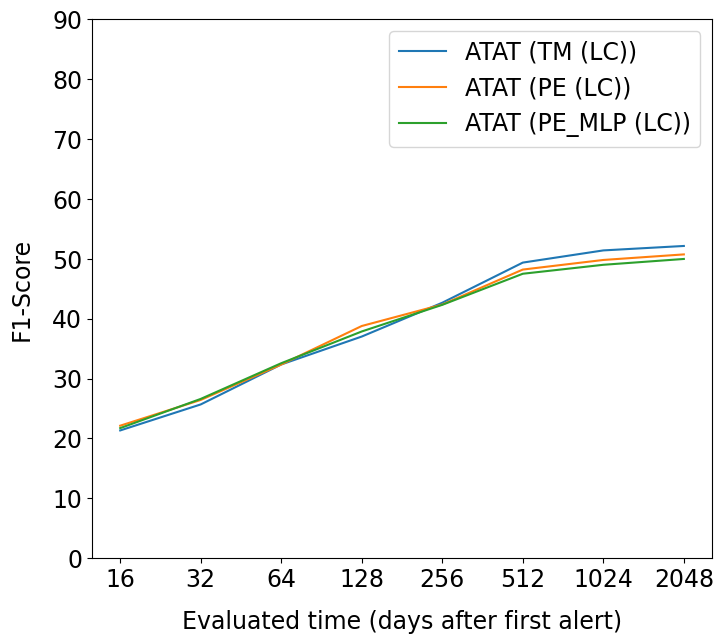

In [31]:
list_eval_time = [16, 32, 64, 128, 256, 512, 1024, 2048]
models_f1_results_time = {
    'ATAT (TM (LC))': f1_lc_tm,
    'ATAT (PE (LC))': f1_lc_pe,
    'ATAT (PE_MLP (LC))': f1_lc_pe_mlp,

    #'ATAT (LC + MTA)': f1_lc_mta,
    #'ATAT (LC + MD + MTA)': f1_lc_md_mta,
}

plot_values_times(list_eval_time, models_f1_results_time)

In [17]:
#def f1_values(list_eval_time, models_f1_results_time):
#    dict_mean = dict()
#    dict_std = dict()
#
#    for name_model, f1_results_time in models_f1_results_time.items():
#
#        list_f1_mean_fold = []
#        list_f1_std_fold = []
#        for eval_time in list_eval_time:
#
#            f1_folds = []
#            for _, results in f1_results_time.items():
#                f1_folds.append(results['test_{}'.format(eval_time)])
#
#            list_f1_mean_fold.append(np.mean(f1_folds)*100)
#            list_f1_std_fold.append(np.std(f1_folds)*100)
#
#        list_f1_mean_fold = np.array(list_f1_mean_fold)
#        list_f1_std_fold = np.array(list_f1_std_fold)
#
#        dict_mean[name_model] = list_f1_mean_fold
#        dict_std[name_model] = list_f1_std_fold
#
#    return dict_mean, dict_std
#
#dict_mean, dict_std = f1_values(list_eval_time, models_f1_results_time)

In [18]:
order_models = [['ATAT (LC)', 'ATAT (LC + MTA)'], 
                ['ATAT (Features)', 'ATAT (Features + MTA)', 'ATAT (Features + MD)', 'ATAT (Features + MD + MTA)', 'ATAT (MD)'],
                ['ATAT (LC + MD)', 'ATAT (LC + MD + MTA)', 'ATAT (LC + MD + Features)', 'ATAT (LC + MD + Features + MTA)']]

In [19]:
titles = ['(b) Light-curve only ATAT variants\n',
          '(c) Tabular data only ATAT variants\nplus RF baseline',
          '(d) Combined Light-curve and tabular\ndata ATAT variants']

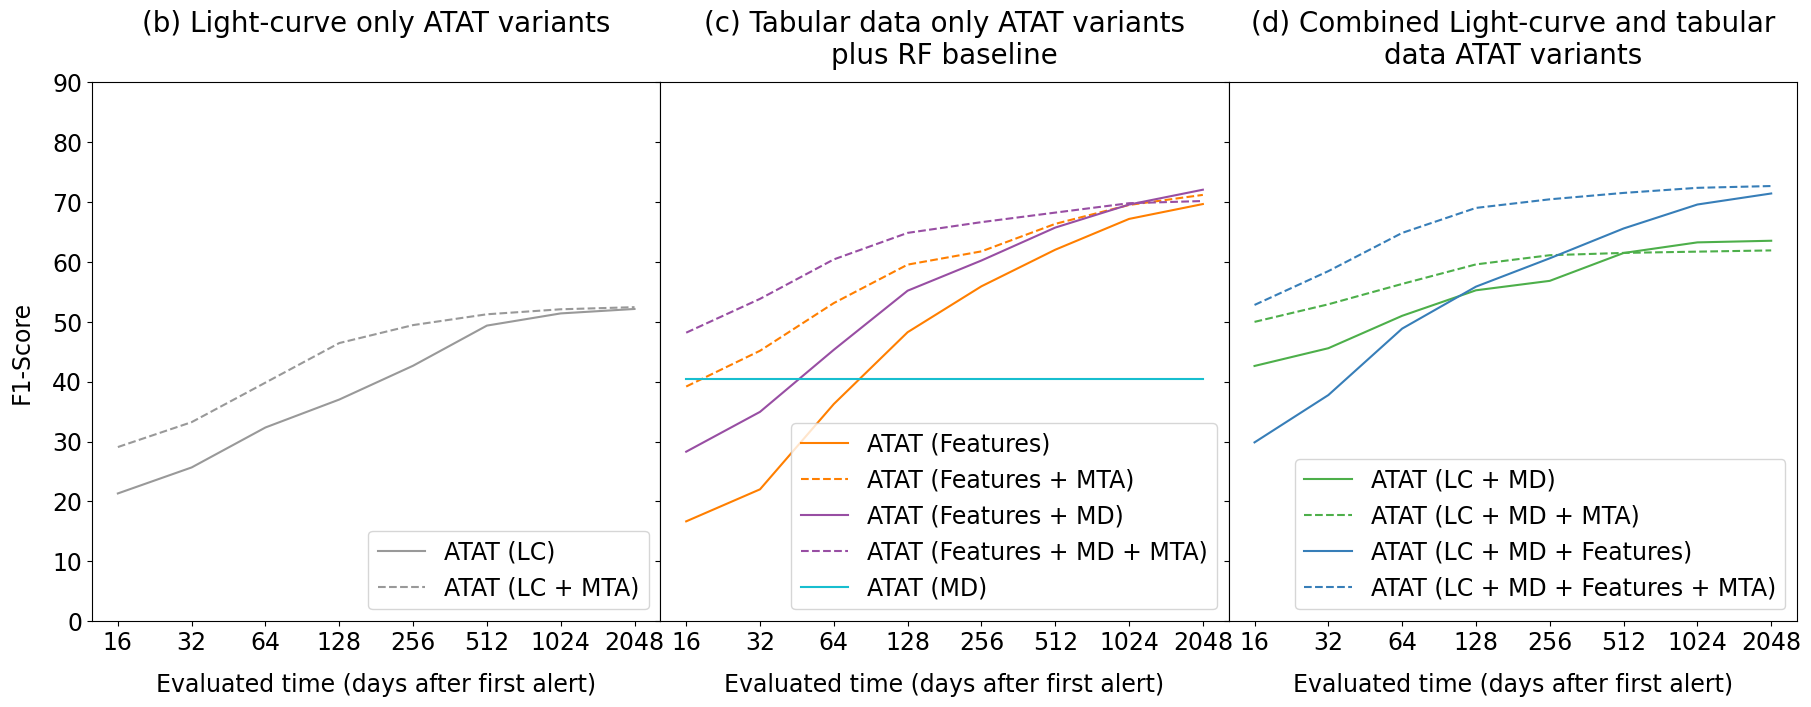

In [20]:
fs = 17
ylim_min = 0
ylim_max = 90


fig, axes = plt.subplots(1, 3, figsize=(22, 7), sharey=True, gridspec_kw=dict(wspace=0))

for i, models_in_plot in enumerate(order_models):
    axes[i].set_title(titles[i], size=20, pad=13)

    for name_model in models_in_plot:
        list_f1_mean_fold = models_f1_results_time[name_model]
        #list_f1_std_fold = models_f1_results_time[name_model]

        if name_model.find('MTA') != -1:
            linestyle='dashed'
        else:
            linestyle='-'

        axes[i].plot(np.log(list_eval_time)/np.log(2), np.array(list_f1_mean_fold)*100, label=name_model, linestyle=linestyle, color=colors[name_model])
    
        #axes[i].fill_between(np.log(list_eval_time)/np.log(2), 
        #                     list_f1_mean_fold + list_f1_std_fold, 
        #                     list_f1_mean_fold - list_f1_std_fold, 
        #                     alpha=0.4, color=colors[name_model])

        axes[i].tick_params(axis="y", labelsize=fs) 
        axes[i].set_xticks(np.log(list_eval_time)/np.log(2)) 
        axes[i].set_xticklabels(list_eval_time, fontsize=fs)

        if i == 0: axes[i].set_ylabel("F1-Score", fontsize=fs, labelpad=13)
        axes[i].set_xlabel("Evaluated time (days after first alert)", fontsize=fs, labelpad=13)

        axes[i].set_ylim((ylim_min, ylim_max))
        axes[i].legend(fontsize=fs, loc='lower right')

#axes[1].plot(np.log(list_eval_time)/np.log(2), f1_added['mean']*100, label='RF (Features + MD)', linestyle='-', color='#e41a1c')
#
#axes[1].fill_between(np.log(list_eval_time)/np.log(2), 
#                f1_added['mean']*100 + f1_added['std']*100, 
#                f1_added['mean']*100 - f1_added['std']*100, 
#                alpha=0.4, color='#e41a1c')

axes[1].legend(fontsize=fs, loc='lower right')

#plt.savefig("all_curves_teval_b_c_d_last.pdf", format="pdf", bbox_inches="tight")
plt.show()

[5.5924488833089825, 7.974271569684734, 12.309613086808602, 16.10451957252426, 24.517315010749293, 33.492402182086785, 44.520016700434724, 53.92589078814303]
[22.331195537642785, 25.90002154982059, 29.63474621528392, 34.60279094489416, 41.538747588262886, 48.457959564526085, 55.23797173096606, 62.91383546352202]
[49.943777617947966, 52.72125854212915, 55.77067905515057, 57.57626630625163, 60.11037187722438, 62.938131376344316, 67.50386430455049, 69.98862450081748]
[18.26266596394235, 20.04075232502419, 25.50441326568855, 40.59637549542552, 38.27818047073812, 41.6986181438052, 45.83297179951353, 52.28662841675145]
[46.39704331734238, 45.47328393361352, 48.56133421387034, 56.854457021033966, 56.1472958591285, 58.27728842677226, 61.10438379479375, 63.339467629703364]


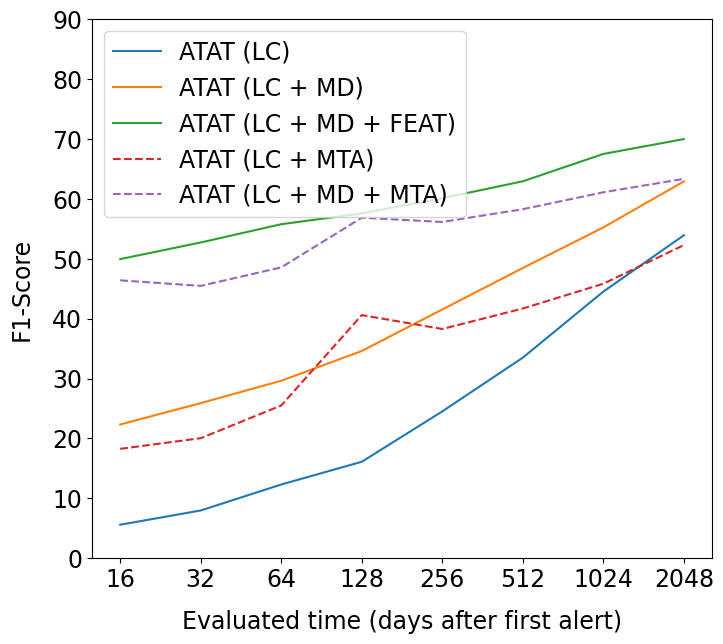

In [17]:
list_eval_time = [16, 32, 64, 128, 256, 512, 1024, 2048]
models_f1_results_time = {
    'ATAT (LC)': f1_lc,
    'ATAT (LC + MD)': f1_lc_md,
    'ATAT (LC + MD + FEAT)': f1_lc_md_feat,

    'ATAT (LC + MTA)': f1_lc_mta,
    'ATAT (LC + MD + MTA)': f1_lc_md_mta,
}

plot_values_times(list_eval_time, models_f1_results_time)

In [68]:
f1_lc = get_metrics(exp_name='epoch1000_patience30_lr1e-4_MAX200', clf_type='lc')
f1_lc_over = get_metrics(exp_name='epoch1000_patience30_lr1e-4_MAX200_oversampling', clf_type='lc')
f1_lc_window = get_metrics(exp_name='epoch1000_patience30_lr1e-4_MAX200_window', clf_type='lc')
f1_lc_g = get_metrics(exp_name='epoch1000_patience30_lr1e-4_MAX200_band_g', clf_type='lc')
f1_lc_r = get_metrics(exp_name='epoch1000_patience30_lr1e-4_MAX200_band_r', clf_type='lc')
f1_lc_md = get_metrics(exp_name='epoch1000_patience30_lr1e-4_MAX200_lc_md1', clf_type='mix')

[3.6096576701300584, 4.446612065450422, 5.59620910816614, 9.619080935457847, 16.789848613750898, 23.47858221980553, 30.2437932377458, 42.88506578989324, 54.50033181872307]
[3.4511918482397, 4.860536846671353, 7.881198716577805, 12.417720106392517, 18.3328867830215, 22.537778363394565, 29.243693445343965, 41.2204248419813, 53.50175102785734]
[18.311734588613895, 22.52874969824704, 28.164580887117307, 34.819763322635126, 40.510609323124136, 45.78364248827594, 50.544834347933055, 51.40599496164916, 51.70746151165714]
[4.5513253867459, 4.8438458240259585, 5.95575759061399, 9.566691165762796, 12.43009848425896, 15.587110203415985, 23.3325851111872, 38.65062300068646, 50.402740031555695]
[2.7038300894311087, 3.2394370271609914, 5.656535932284865, 9.125071740129574, 12.147588848888823, 17.940365326511753, 22.93971651094173, 34.67239106058197, 49.050166496192595]
[25.734524495531158, 27.649349568692017, 30.92672363075294, 35.328808061219846, 43.244009812326674, 47.372187088878825, 52.026043268

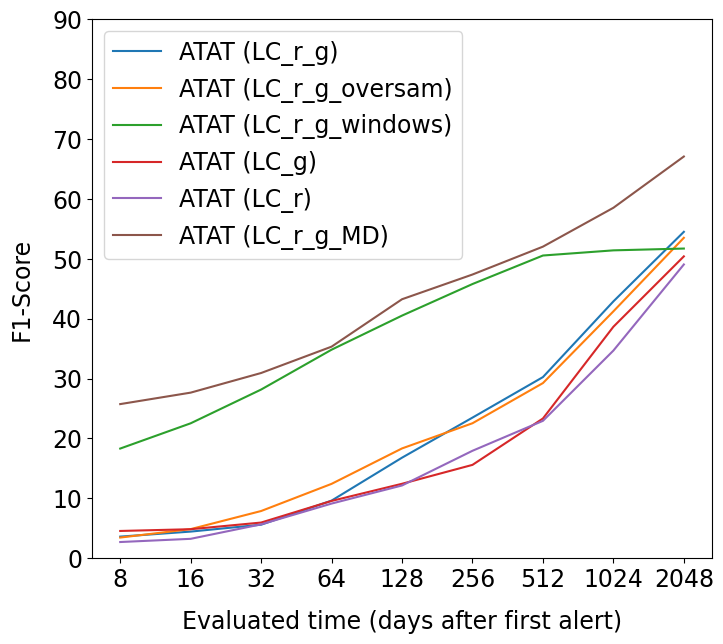

In [72]:
list_eval_time = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
models_f1_results_time = {
    'ATAT (LC_r_g)': f1_lc,
    'ATAT (LC_r_g_oversam)': f1_lc_over,
    'ATAT (LC_r_g_windows)': f1_lc_window,
    'ATAT (LC_g)': f1_lc_g,
    'ATAT (LC_r)': f1_lc_r,

    'ATAT (LC_r_g_MD)': f1_lc_md,
}

plot_values_times(list_eval_time, models_f1_results_time):

In [ ]:
f1_lc = get_metrics(exp_name='epoch1000_patience30_lr1e-4_MAX200', clf_type='lc')
f1_lc_over = get_metrics(exp_name='epoch1000_patience30_lr1e-4_MAX200_oversampling', clf_type='lc')
f1_lc_window = get_metrics(exp_name='epoch1000_patience30_lr1e-4_MAX200_window', clf_type='lc')
f1_lc_g = get_metrics(exp_name='epoch1000_patience30_lr1e-4_MAX200_band_g', clf_type='lc')
f1_lc_r = get_metrics(exp_name='epoch1000_patience30_lr1e-4_MAX200_band_r', clf_type='lc')
f1_lc_md = get_metrics(exp_name='epoch1000_patience30_lr1e-4_MAX200_lc_md1', clf_type='mix')

In [ ]:
list_eval_time = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
models_f1_results_time = {
    'ATAT (LC)': f1_lc,
    'ATAT (LC + MTA)': f1_lc_mtime,
}

plot_values_times(list_eval_time, models_f1_results_time, colors=colors)

In [ ]:
for set_type, batches_pred in dict_pred_times.items():
    f1_results_time['fold_{}'.format(i)][set_type] = f1_score(target, 
                                                                np.argmax(batches_pred, axis = 1), 
                                                                average='macro')

In [6]:
f1_lc_header_mtime, _, _, _ = get_metrics(list_path_predictions='{}/lc_tab/Exp_cfg_-arch=lc_header_mtime-seed=*'.format(name_file_results))
f1_lc_header_feat_mtime, _, _, _ = get_metrics(list_path_predictions='{}/lc_tab/Exp_cfg_-arch=lc_header_feat_mtime-seed=*'.format(name_file_results))

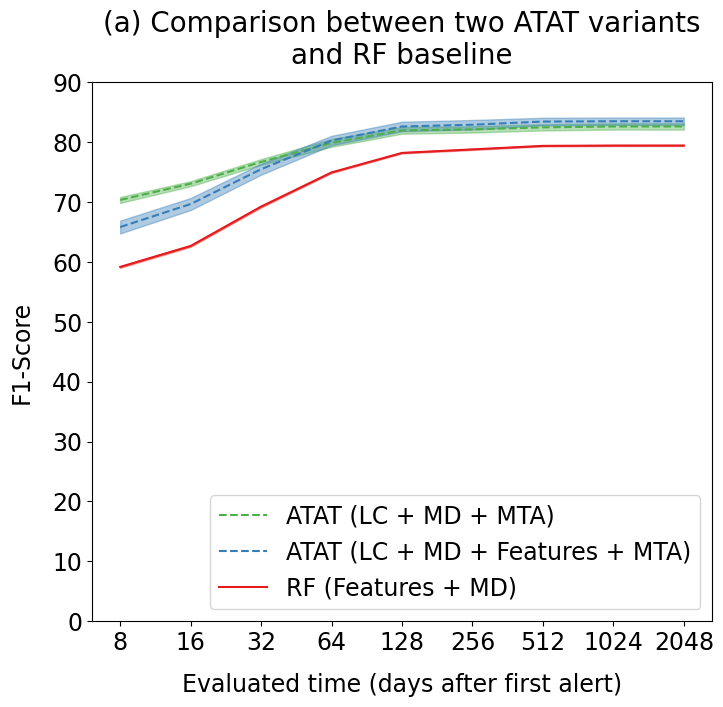

In [7]:
list_eval_time = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
models_f1_results_time = {
    'ATAT (LC + MD + MTA)': f1_lc_header_mtime,
    'ATAT (LC + MD + Features + MTA)': f1_lc_header_feat_mtime,
}

title = '(a) Comparison between two ATAT variants\nand RF baseline'
plot_values_times(list_eval_time, models_f1_results_time, title, colors=colors, f1_added=f1_added)

## Plot 1

In [8]:
f1_lc, _, _, _ = get_metrics(list_path_predictions='{}/lc/Exp_cfg_-arch=lc-seed=*'.format(name_file_results))
f1_lc_mtime, _, _, _ = get_metrics(list_path_predictions='{}/lc/Exp_cfg_-arch=lc_mtime-seed=*'.format(name_file_results))

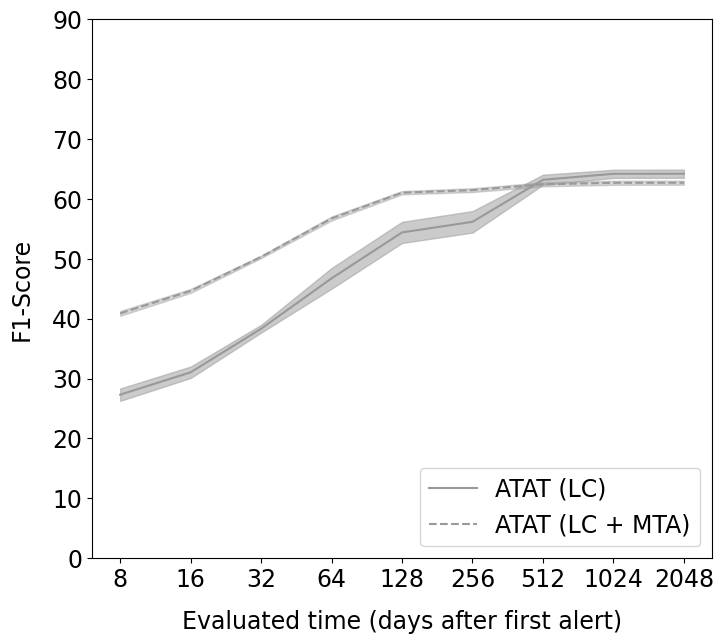

In [9]:
list_eval_time = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
models_f1_results_time = {
    'ATAT (LC)': f1_lc,
    'ATAT (LC + MTA)': f1_lc_mtime,
}

plot_values_times(list_eval_time, models_f1_results_time, colors=colors)

## Plot 2

In [10]:
f1_features, _, _, _ = get_metrics(list_path_predictions='{}/tab/Exp_cfg_-arch=features-seed=*'.format(name_file_results))
f1_features_mtime, _, _, _ = get_metrics(list_path_predictions='{}/tab/Exp_cfg_-arch=features_mtime-seed=*'.format(name_file_results))
f1_header_feat, _, _, _ = get_metrics(list_path_predictions='{}/tab/Exp_cfg_-arch=header_feat-seed=*'.format(name_file_results))
f1_header_feat_mtime, _, _, _ = get_metrics(list_path_predictions='{}/tab/Exp_cfg_-arch=header_feat_mtime-seed=*'.format(name_file_results))
f1_header, _, _, _ = get_metrics(list_path_predictions='{}/tab/Exp_cfg_-arch=header-seed=*'.format(name_file_results))

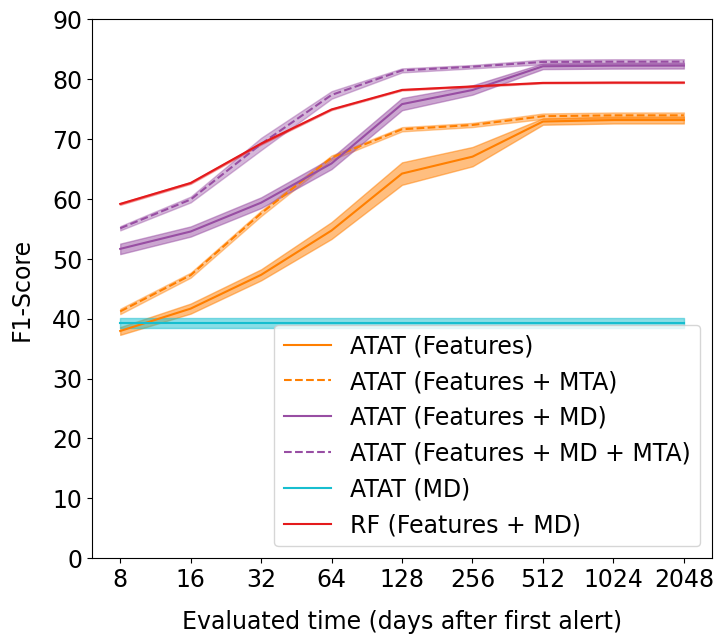

In [11]:
list_eval_time = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
models_f1_results_time = {
    'ATAT (Features)': f1_features,
    'ATAT (Features + MTA)': f1_features_mtime,
    'ATAT (Features + MD)': f1_header_feat,
    'ATAT (Features + MD + MTA)': f1_header_feat_mtime,
    'ATAT (MD)': f1_header,
}

plot_values_times(list_eval_time, models_f1_results_time, colors=colors, f1_added=f1_added)

## Plot 3

In [12]:
f1_lc_header, _, _, _ = get_metrics(list_path_predictions='{}/lc_tab/Exp_cfg_-arch=lc_header-seed=*'.format(name_file_results))
f1_lc_header_mtime, _, _, _ = get_metrics(list_path_predictions='{}/lc_tab/Exp_cfg_-arch=lc_header_mtime-seed=*'.format(name_file_results))
f1_lc_header_feat, _, _, _ = get_metrics(list_path_predictions='{}/lc_tab/Exp_cfg_-arch=lc_header_feat-seed=*'.format(name_file_results))
f1_lc_header_feat_mtime, _, _, _ = get_metrics(list_path_predictions='{}/lc_tab/Exp_cfg_-arch=lc_header_feat_mtime-seed=*'.format(name_file_results))

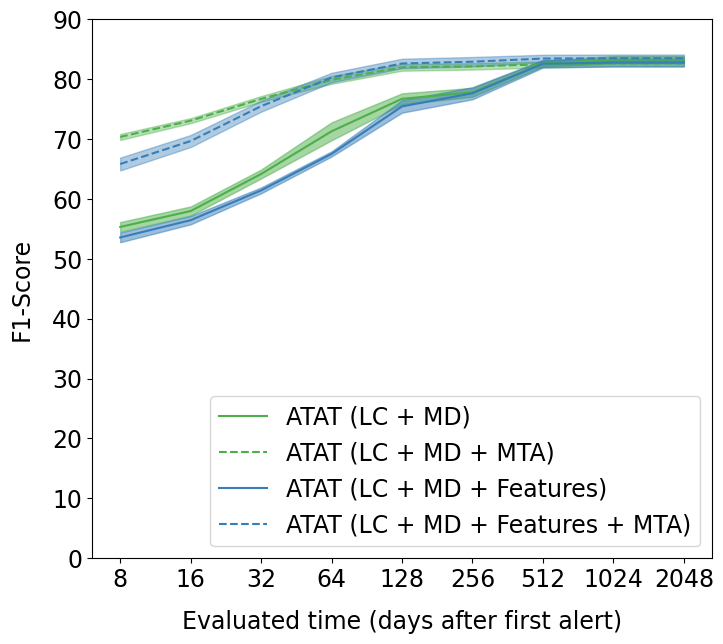

In [13]:
list_eval_time = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
models_f1_results_time = {
    'ATAT (LC + MD)': f1_lc_header,
    'ATAT (LC + MD + MTA)': f1_lc_header_mtime,
    'ATAT (LC + MD + Features)': f1_lc_header_feat,
    'ATAT (LC + MD + Features + MTA)': f1_lc_header_feat_mtime,
}

plot_values_times(list_eval_time, models_f1_results_time, colors=colors)

## Joint plot

In [14]:
list_eval_time = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]

models_f1_results_time = {
    'ATAT (LC)': f1_lc,
    'ATAT (LC + MTA)': f1_lc_mtime,
    'ATAT (Features)': f1_features,
    'ATAT (Features + MTA)': f1_features_mtime,
    'ATAT (Features + MD)': f1_header_feat,
    'ATAT (Features + MD + MTA)': f1_header_feat_mtime,
    'ATAT (MD)': f1_header,
    'ATAT (LC + MD)': f1_lc_header,
    'ATAT (LC + MD + MTA)': f1_lc_header_mtime,
    'ATAT (LC + MD + Features)': f1_lc_header_feat,
    'ATAT (LC + MD + Features + MTA)': f1_lc_header_feat_mtime,
}

In [15]:
dict_mean, dict_std = f1_values(list_eval_time, models_f1_results_time)

In [16]:
order_models = [['ATAT (LC)', 'ATAT (LC + MTA)'], 
                ['ATAT (Features)', 'ATAT (Features + MTA)', 'ATAT (Features + MD)', 'ATAT (Features + MD + MTA)', 'ATAT (MD)'],
                ['ATAT (LC + MD)', 'ATAT (LC + MD + MTA)', 'ATAT (LC + MD + Features)', 'ATAT (LC + MD + Features + MTA)']]

In [17]:
titles = ['(b) Light-curve only ATAT variants\n',
          '(c) Tabular data only ATAT variants\nplus RF baseline',
          '(d) Combined Light-curve and tabular\ndata ATAT variants']

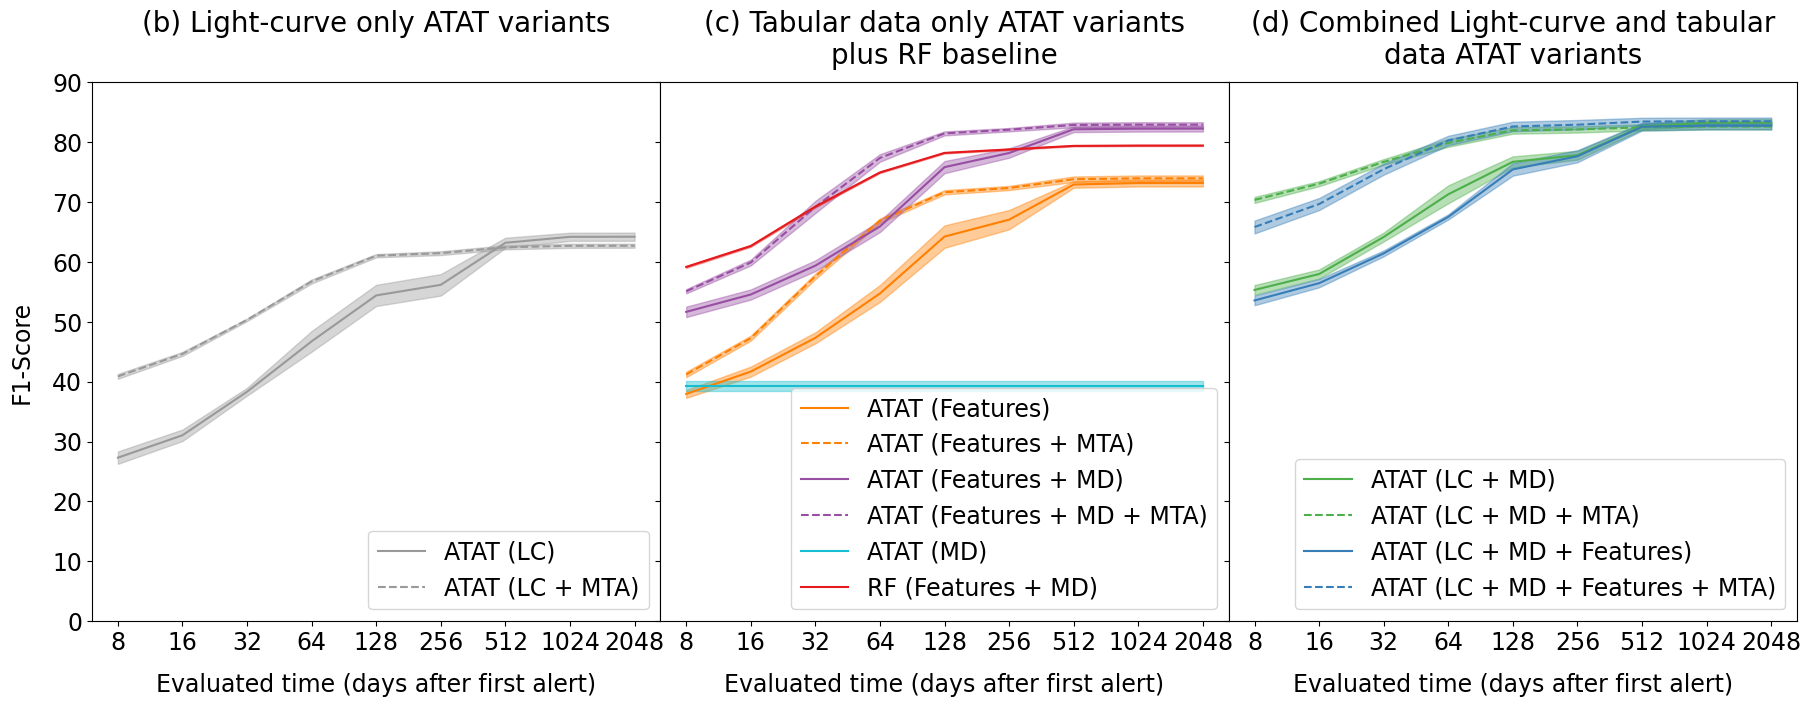

In [18]:
fs = 17
ylim_min = 0
ylim_max = 90


fig, axes = plt.subplots(1, 3, figsize=(22, 7), sharey=True, gridspec_kw=dict(wspace=0))

for i, models_in_plot in enumerate(order_models):
    axes[i].set_title(titles[i], size=20, pad=13)

    for name_model in models_in_plot:
        list_f1_mean_fold = dict_mean[name_model]
        list_f1_std_fold = dict_std[name_model]

        if name_model.find('MTA') != -1:
            linestyle='dashed'
        else:
            linestyle='-'

        axes[i].plot(np.log(list_eval_time)/np.log(2), list_f1_mean_fold, label=name_model, linestyle=linestyle, color=colors[name_model])
    
        axes[i].fill_between(np.log(list_eval_time)/np.log(2), 
                             list_f1_mean_fold + list_f1_std_fold, 
                             list_f1_mean_fold - list_f1_std_fold, 
                             alpha=0.4, color=colors[name_model])

        axes[i].tick_params(axis="y", labelsize=fs) 
        axes[i].set_xticks(np.log(list_eval_time)/np.log(2)) 
        axes[i].set_xticklabels(list_eval_time, fontsize=fs)

        if i == 0: axes[i].set_ylabel("F1-Score", fontsize=fs, labelpad=13)
        axes[i].set_xlabel("Evaluated time (days after first alert)", fontsize=fs, labelpad=13)

        axes[i].set_ylim((ylim_min, ylim_max))
        axes[i].legend(fontsize=fs, loc='lower right')

axes[1].plot(np.log(list_eval_time)/np.log(2), f1_added['mean']*100, label='RF (Features + MD)', linestyle='-', color='#e41a1c')

axes[1].fill_between(np.log(list_eval_time)/np.log(2), 
                f1_added['mean']*100 + f1_added['std']*100, 
                f1_added['mean']*100 - f1_added['std']*100, 
                alpha=0.4, color='#e41a1c')

axes[1].legend(fontsize=fs, loc='lower right')

#plt.savefig("all_curves_teval_b_c_d_last.pdf", format="pdf", bbox_inches="tight")
plt.show()


## Ablation study

In [19]:
f1_tm_lc, _, _, _ = get_metrics(list_path_predictions='{}/lc/Exp_cfg_-arch=lc_mtime-seed=*'.format(name_file_results))
f1_pe_lc, _, _, _ = get_metrics(list_path_predictions='{}/ablation/Exp_cfg_-arch=lc_pos_enc_mtime-seed=*'.format(name_file_results))

f1_tm_lc_md, _, _, _ = get_metrics(list_path_predictions='{}/ablation/Exp_cfg_-arch=lc_header_mtime_no_qt-seed=*'.format(name_file_results))
f1_pe_lc_md, _, _, _ = get_metrics(list_path_predictions='{}/ablation/Exp_cfg_-arch=lc_header_pos_enc_mtime_no_qt-seed=*'.format(name_file_results))

f1_tm_lc_md_qt, _, _, _ = get_metrics(list_path_predictions='{}/lc_tab/Exp_cfg_-arch=lc_header_mtime-seed=*'.format(name_file_results))
f1_pe_lc_md_qt, _, _, _ = get_metrics(list_path_predictions='{}/ablation/Exp_cfg_-arch=lc_header_pos_enc_mtime-seed=*'.format(name_file_results))

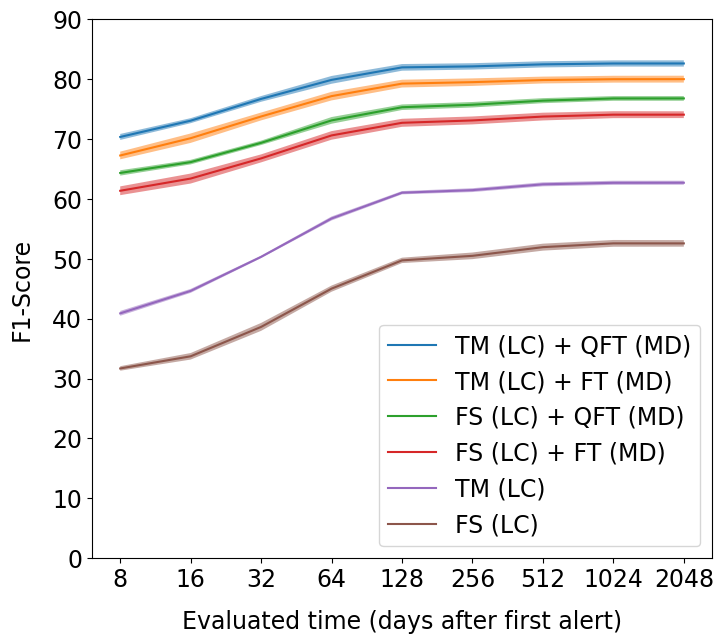

In [20]:
list_eval_time = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]

models_f1_results_time = {
    'TM (LC) + QFT (MD)': f1_tm_lc_md_qt,
    'TM (LC) + FT (MD)': f1_tm_lc_md,
    'FS (LC) + QFT (MD)': f1_pe_lc_md_qt,
    'FS (LC) + FT (MD)': f1_pe_lc_md,
    'TM (LC)': f1_tm_lc,
    'FS (LC)': f1_pe_lc,
}

plot_result_ablation(list_eval_time, models_f1_results_time)